In [159]:
import numpy as np; import matplotlib.pyplot as plt 
import seaborn as sns
import tikzplotlib

sns.set_theme(font_scale = 2)

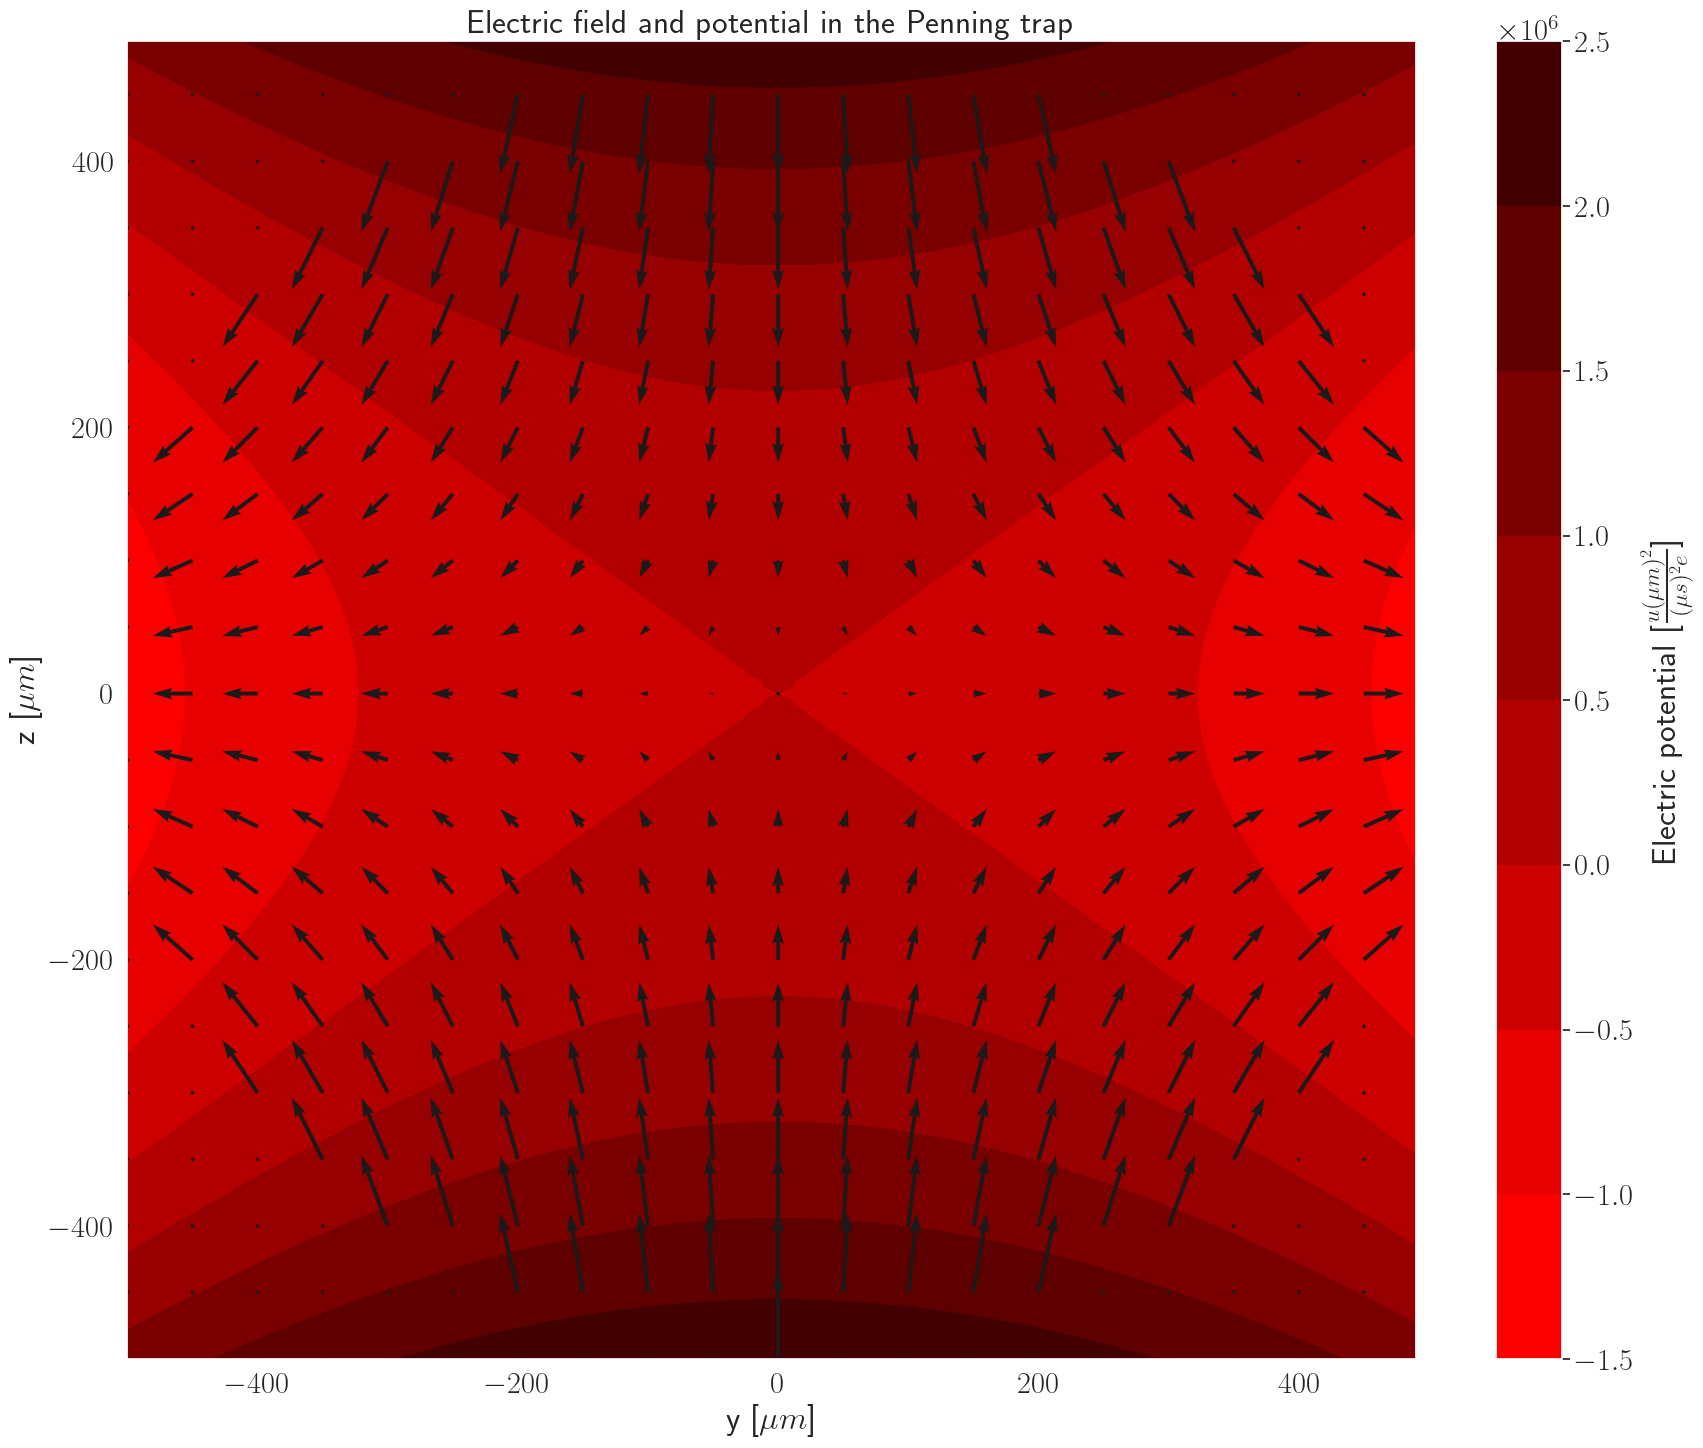

In [161]:
data = np.loadtxt('ElectricField.txt')

N = 100
Ex = np.zeros(shape = (N, N))
Ey = np.zeros(shape = (N, N))
Ez = np.zeros(shape = (N, N))

X = np.zeros(shape = (N, N))
Y = np.zeros(shape = (N, N))
Z = np.zeros(shape = (N, N))

V = np.zeros(shape = (N, N))

for i in range(N**2):
    ind1 = int(data[i, 0])
    ind2 = int(data[i, 1])
    X[ind1, ind2] = data[i, 2]
    Y[ind1, ind2] = data[i, 3]
    Z[ind1, ind2] = data[i, 4] 

    Ex[ind1, ind2] = data[i, 5]
    Ey[ind1, ind2] = data[i, 6]
    Ez[ind1, ind2] = data[i, 7]  
    V[ind1, ind2] = data[i, 8]       
    
fig, axs = plt.subplots(ncols = 1, nrows = 1, figsize = (18, 15))
plt.contourf(Y, Z, V, cmap = 'flag')
cbar = plt.colorbar(cmap = 'flag')
cbar.set_label(r'Electric potential [$\frac{u(\mu m)^2}{(\mu s)^2 e}$]')
axs.quiver(Y[::5, ::5], Z[::5, ::5], Ey[::5, ::5], Ez[::5, ::5])
axs.set_xlabel(r'y [$\mu m$]')
axs.set_ylabel(r'z [$\mu m$]')
axs.set_title('Electric field and potential in the Penning trap')
fig.tight_layout()
plt.savefig('penningTrapSetup.pdf')
#tikzplotlib.clean_figure()
tikzplotlib.save(
            f"penningTrapSetup.tex",
            extra_axis_parameters=[
                "title style={align=center}",
                "xmajorticks=true",
                "ymajorticks=true",
                "mark options={mark size=2.5pt, line width=1.5pt}",
            ],
            strict=True,
        )
plt.show()


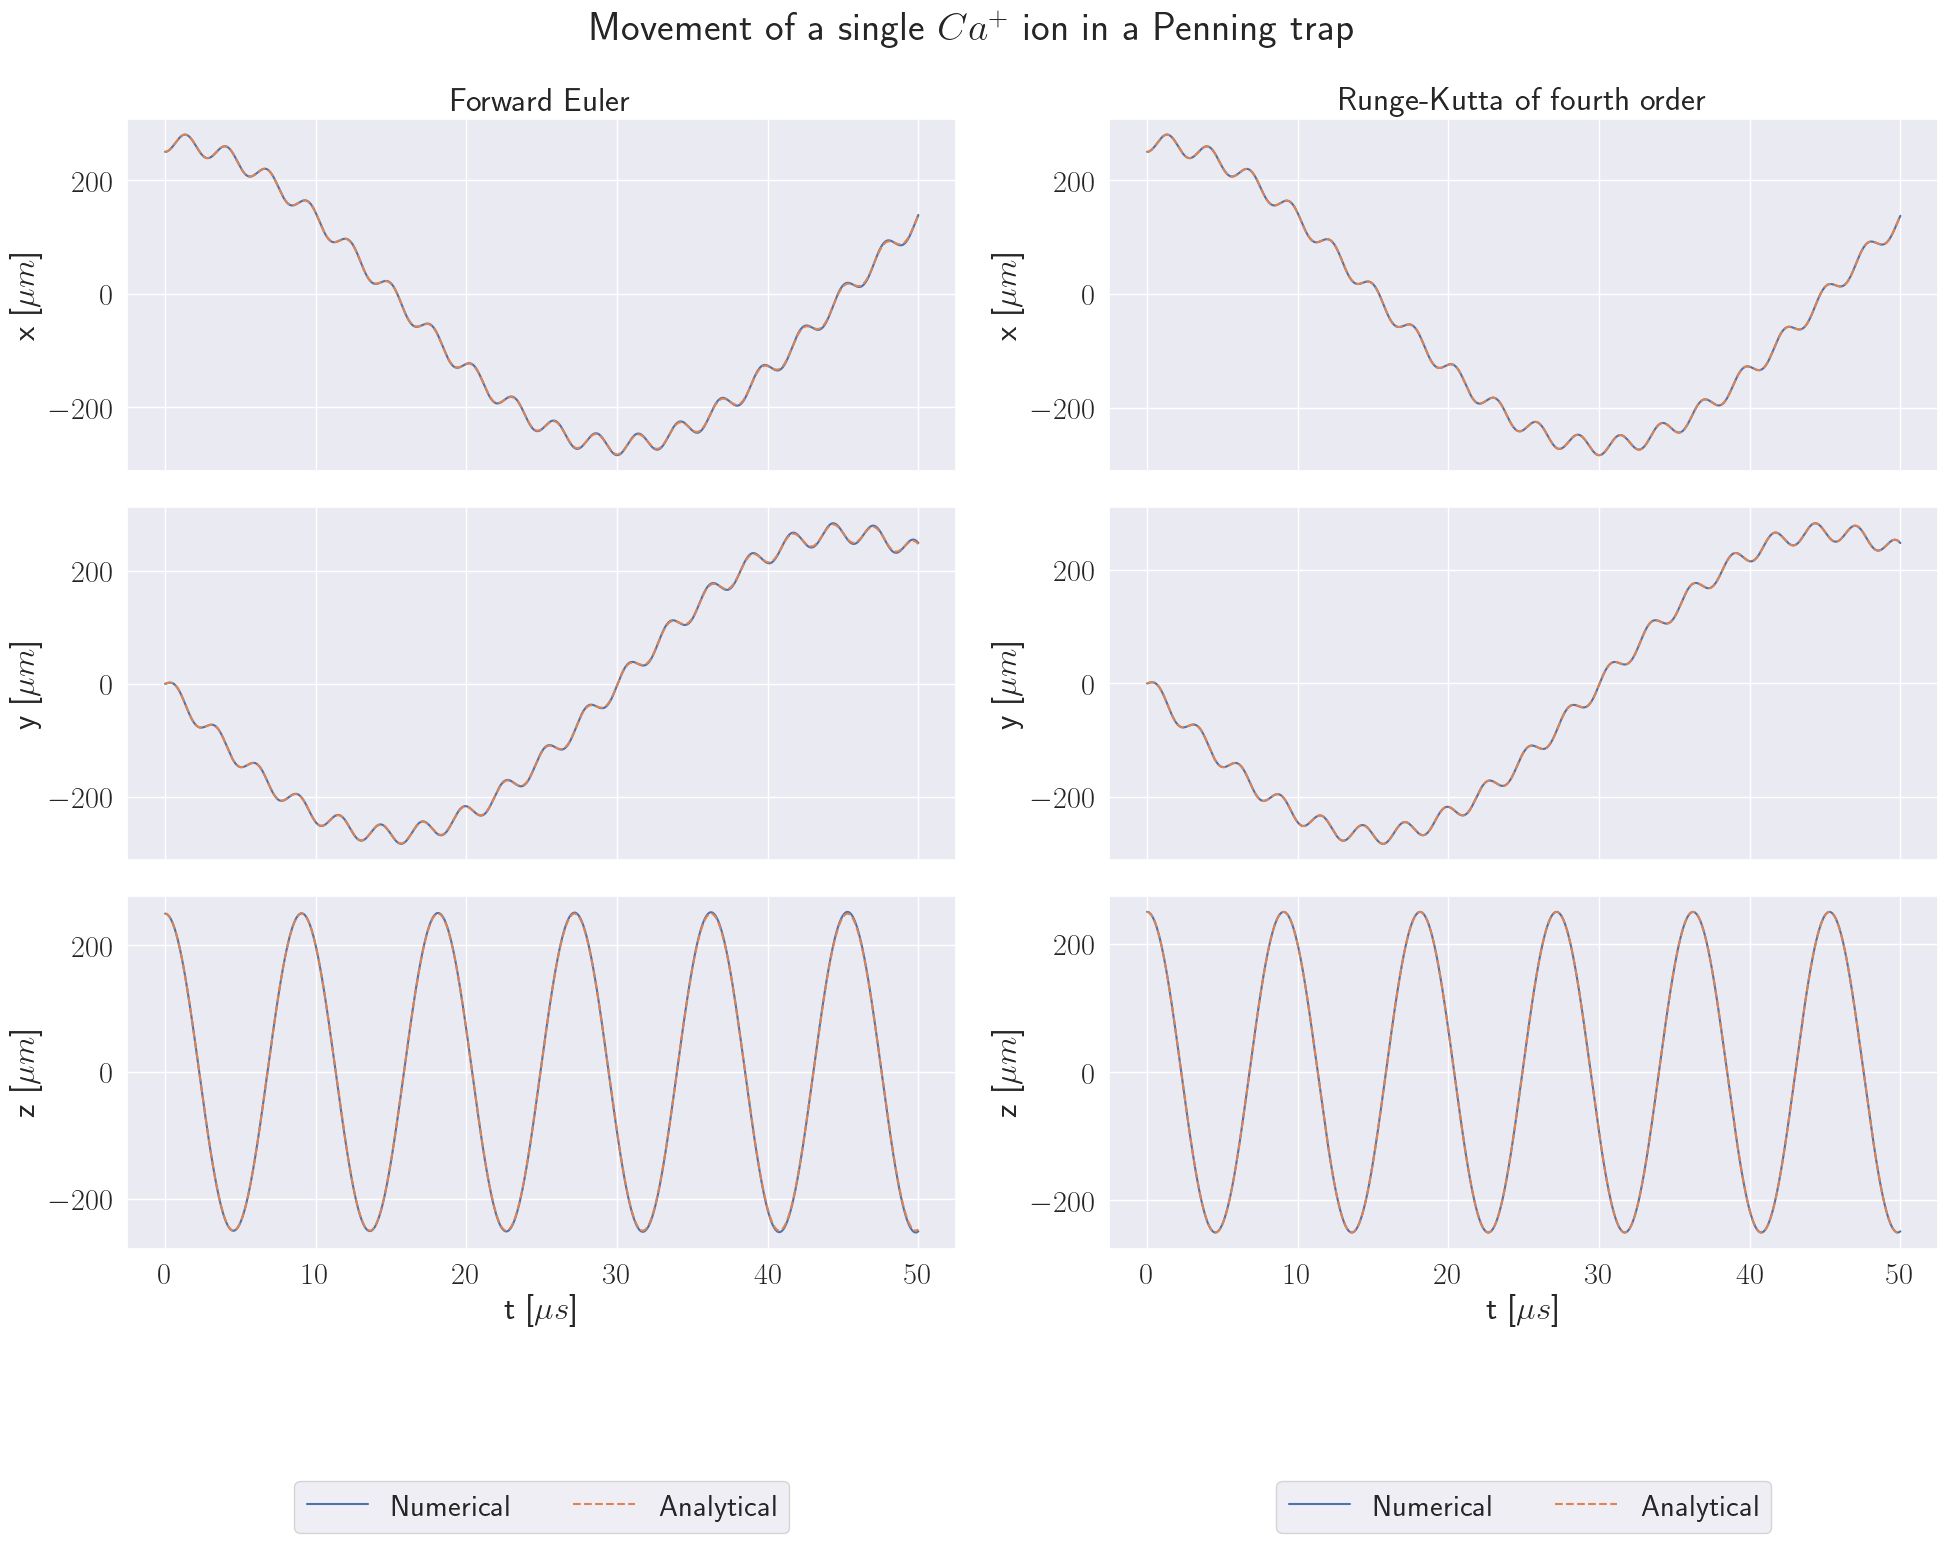

In [162]:
files = ['testOneParticleFE.txt', 'testOneParticleRK4.txt']

FE = np.loadtxt(files[0])
RK4 = np.loadtxt(files[1])
tFE = FE[:, 0]; tRK4 = RK4[:, 0]
posFE = FE[:, 1:4]; posRK4 = RK4[:, 1:4]
velFE = FE[:, 4:]; velRK4 = RK4[:, 4:]

q = 1
V0 = 2.41e6
B0 = 9.65e1
m = 40.078
d = 500
wz = np.sqrt(2*q*V0/(m*d**2)) 
w0 = q*B0/m

v0 = velFE[0, 1]; x0 = posFE[0, 0]; z0 = posFE[0, 0]

wp = (w0 + np.sqrt(w0**2 - 2*wz**2))/2
wm = (w0 - np.sqrt(w0**2 - 2*wz**2))/2

Ap = (v0 + wm*x0)/(wm - wp)
Am = -(v0 + wp*x0)/(wm - wp)

f = Ap*np.exp(-1j*wp*tFE) + Am*np.exp(-1j*wm*tFE)
xAna = np.real(f)
yAna = np.imag(f)
zAna = z0*np.cos(wz*tFE)

fig, axs = plt.subplots(3, 2, figsize = (20, 16), sharex = True)
axs[0, 0].plot(tFE, posFE[:, 0])
axs[0, 0].plot(tFE, xAna, linestyle = '--')
axs[0, 0].set_ylabel(r'x [$\mu m$]')

axs[1, 0].plot(tFE, posFE[:, 1])
axs[1, 0].plot(tFE, yAna, linestyle = '--')
axs[1, 0].set_ylabel(r'y [$\mu m$]')

axs[2, 0].plot(tFE, posFE[:, 2], label = 'Numerical')
axs[2, 0].plot(tFE, zAna, linestyle = '--', label = 'Analytical')
axs[2, 0].set_ylabel(r'z [$\mu m$]')
axs[2, 0].set_xlabel(r't [$\mu s$]')

axs[0, 1].plot(tRK4, posRK4[:, 0])
axs[0, 1].plot(tRK4, xAna, linestyle = '--')
axs[0, 1].set_ylabel(r'x [$\mu m$]')

axs[1, 1].plot(tRK4, posRK4[:, 1])
axs[1, 1].plot(tRK4, yAna, linestyle = '--')
axs[1, 1].set_ylabel(r'y [$\mu m$]')

axs[2, 1].plot(tRK4, posRK4[:, 2], label = 'Numerical')
axs[2, 1].plot(tRK4, zAna, linestyle = '--', label = 'Analytical')
axs[2, 1].set_ylabel(r'z [$\mu m$]')
axs[2, 1].set_xlabel(r't [$\mu s$]')

axs[0, 0].set_title('Forward Euler')
axs[0, 1].set_title('Runge-Kutta of fourth order')

lgd = axs[2, 0].legend(loc = 'lower center', ncol = 2, fancybox = True, 
        bbox_to_anchor = (0.5, -0.85))
lgd = axs[2, 1].legend(loc = 'lower center', ncol = 2, fancybox = True, 
        bbox_to_anchor = (0.5, -0.85))
fig.suptitle(r'Movement of a single $Ca^{+}$ ion in a Penning trap', y = 0.98)
fig.tight_layout()
plt.savefig('singleParticle.pdf')
tikzplotlib.clean_figure()
tikzplotlib.save(
            f"singleParticle.tex",
            extra_axis_parameters=[
                "title style={align=center}",
                "xmajorticks=true",
                "ymajorticks=true",
                "mark options={mark size=2.5pt, line width=1.5pt}",
            ],
            strict=True,
        )
plt.show()


20.0 44.637624218097315
20.0 44.637624218097315


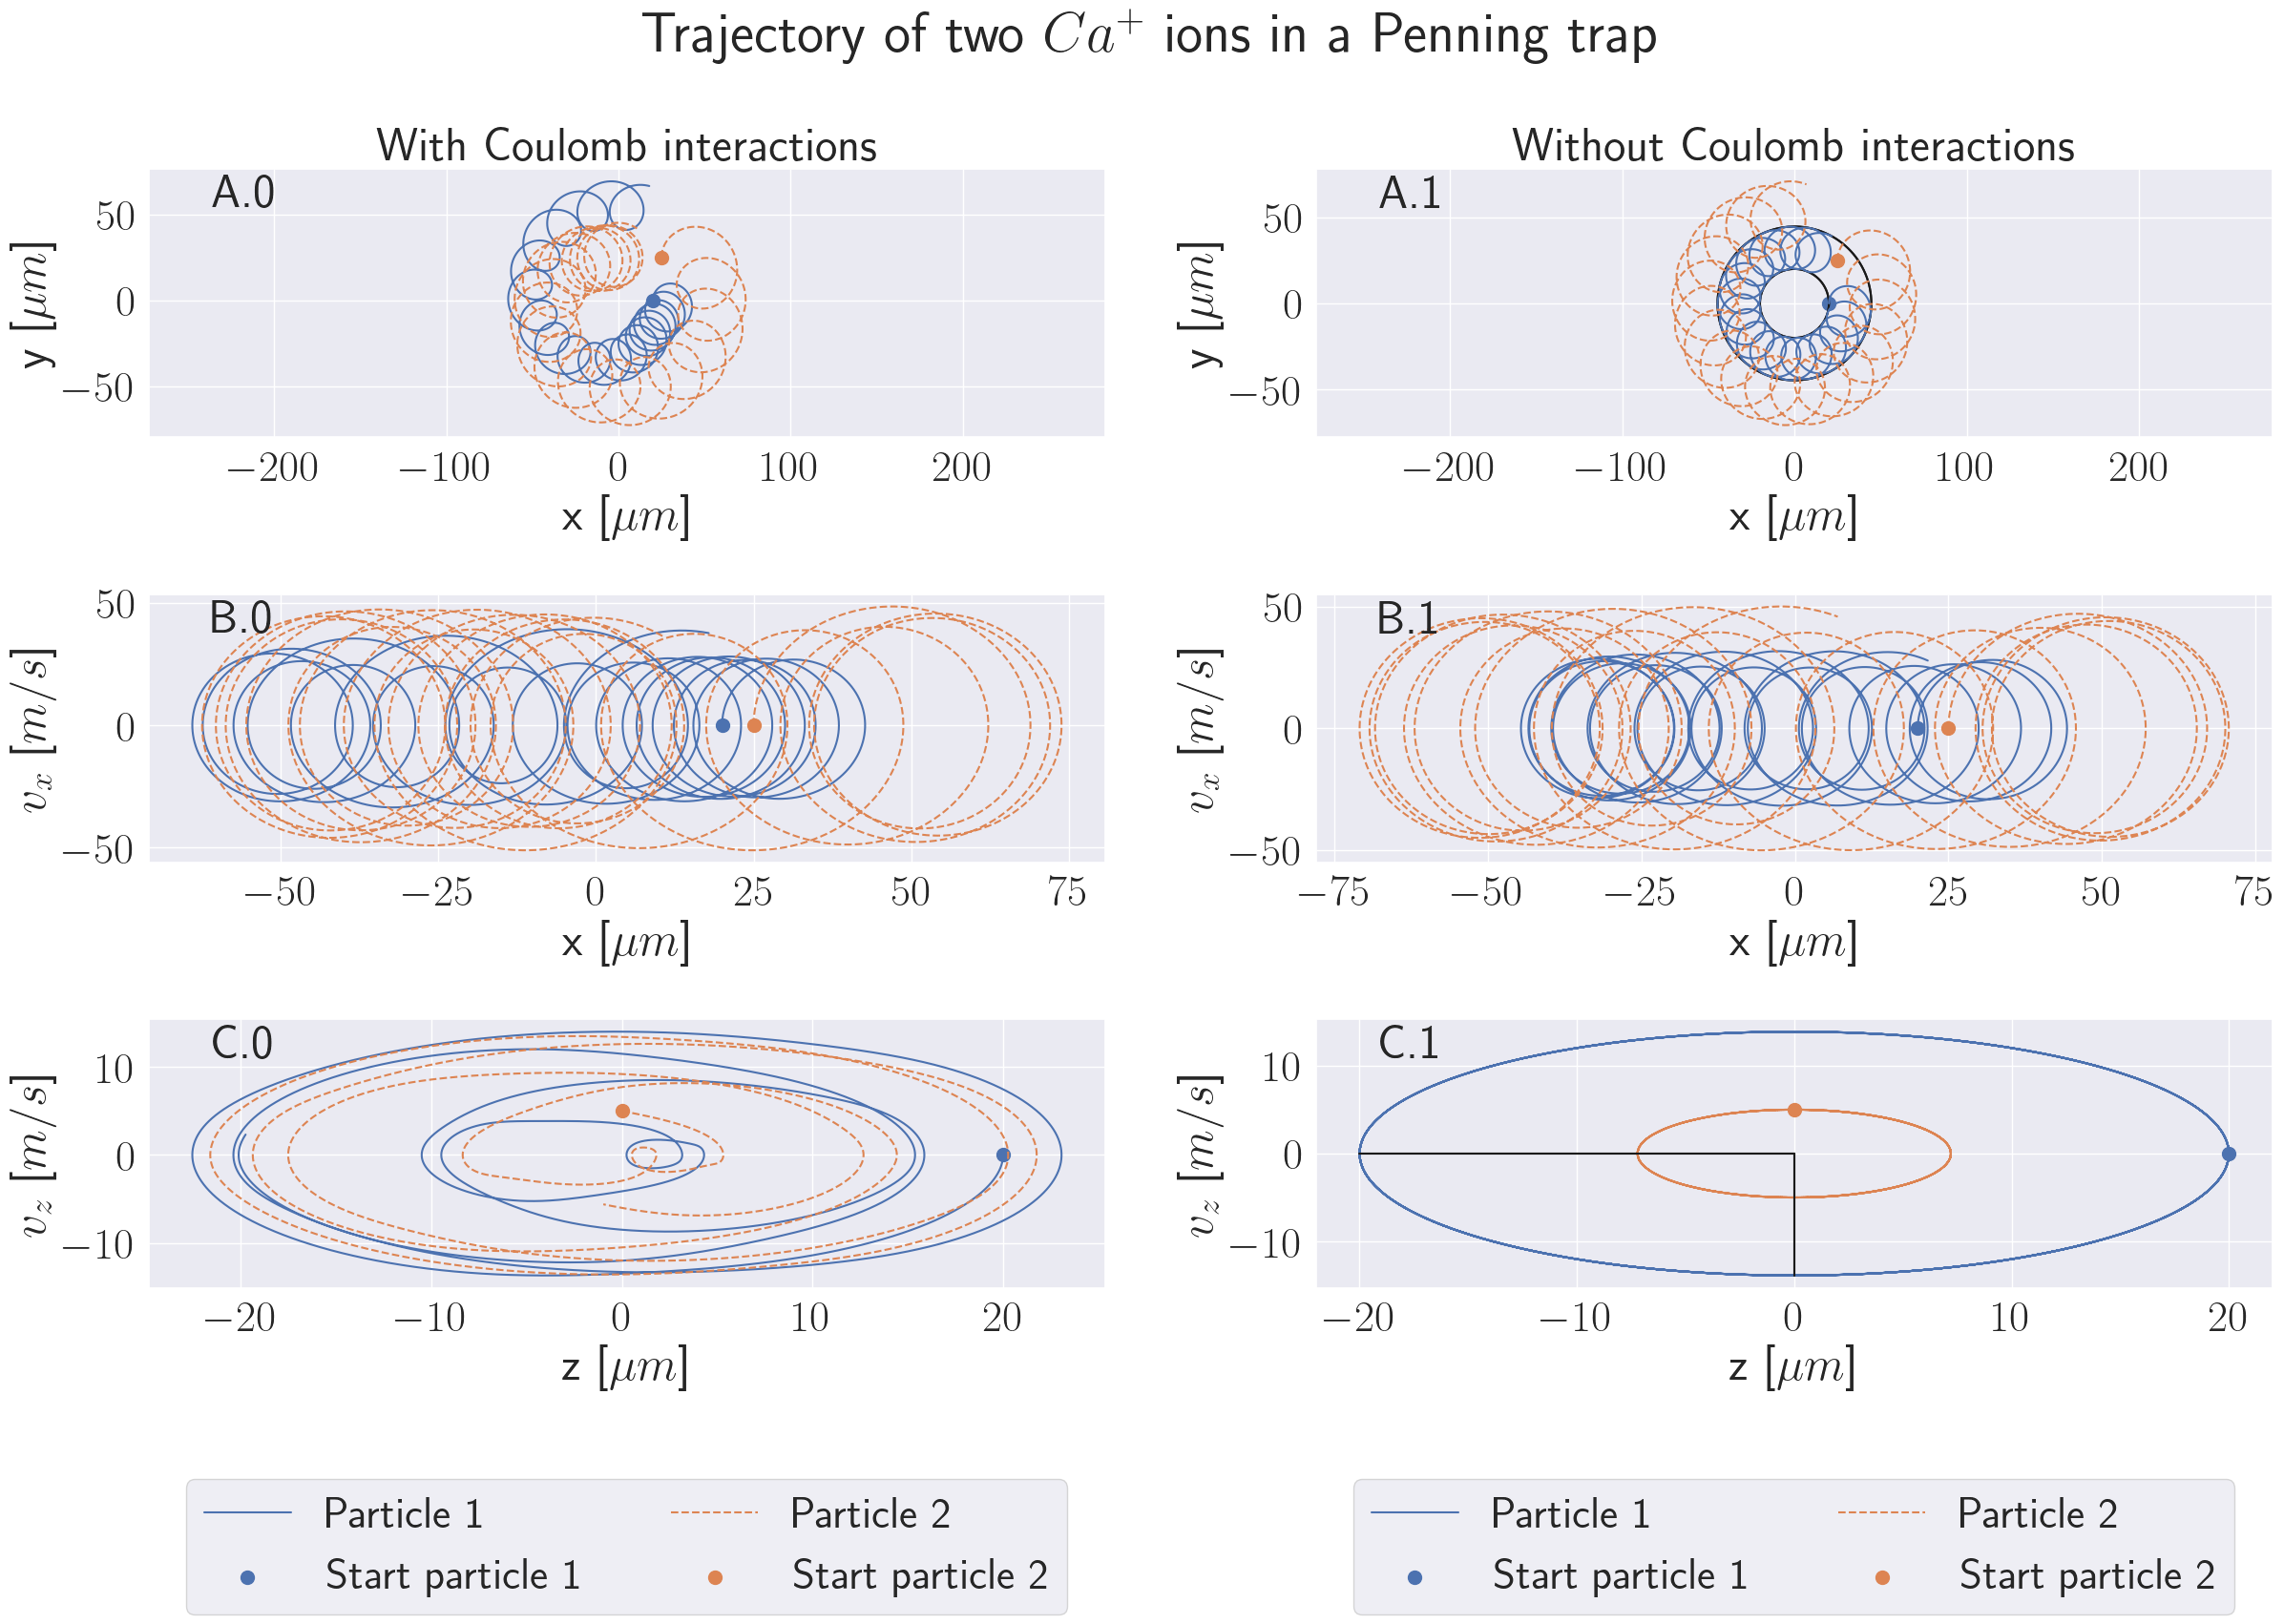

In [150]:
files = ['testDoubleSetupWithInternal.txt', 'testDoubleSetupWithoutInternal.txt']

fig, axs = plt.subplots(3, 2, figsize = (25, 20))
theta = np.arange(0, 2*np.pi, 0.01)

for index, filename in enumerate(files):
    data = np.loadtxt(filename)
    t = data[:, 0]
    pos1 = data[:, 1:4]
    vel1 = data[:, 4:7]
    pos2 = data[:, 7:10]
    vel2 = data[:, 10:13]
    
    wz = np.sqrt(2*q*V0/(m*d**2)) 
    w0 = q*B0/m
    v01 = vel1[0, 1]; v02 = vel2[0, 1]
    x01 = pos1[0, 0]; x02 = pos2[0, 0] 
    wp = (w0 + np.sqrt(w0**2 - 2*wz**2))/2
    wm = (w0 - np.sqrt(w0**2 - 2*wz**2))/2
    Ap1 = (v01 + wm*x01)/(wm - wp); Ap2 = (v02 + wm*x02)/(wm - wp)
    Am1 = -(v01 + wp*x01)/(wm - wp); Am2 = -(v02 + wp*x02)/(wm - wp) 
    Rp1 = Ap1 + Am1; Rp2 = Ap2 + Am2
    Rm1 = np.abs(Ap1 - Am1); Rm2 = np.abs(Ap2 - Am2)
    print(Rp1, Rm1)
    axs[0, 1].plot(Rp1*np.cos(theta), Rp1*np.sin(theta), color = 'k')
    axs[0, 1].plot(Rm1*np.cos(theta), Rm1*np.sin(theta), color = 'k')
    
    axs[0, index].plot(pos1[:, 0], pos1[:, 1])
    axs[0, index].scatter(pos1[0, 0], pos1[0, 1], s = 100)
    axs[0, index].plot(pos2[:, 0], pos2[:, 1], linestyle = '--')
    axs[0, index].scatter(pos2[0, 0], pos2[0, 1], s = 100)
    axs[0, index].set_xlabel(r'x [$\mu m$]')
    axs[0, index].set_ylabel(r'y [$\mu m$]')
    axs[0, index].axis('equal')
    axs[0, index].text(x = 0.1, y = 0.9, s = f'A.{index}', ha = 'center', va = 'center', transform = axs[0, index].transAxes)

    
    axs[1, index].plot(pos1[:, 0], vel1[:, 0])
    axs[1, index].scatter(pos1[0, 0], vel1[0, 0], s = 100)
    axs[1, index].plot(pos2[:, 0], vel2[:, 0], linestyle = '--')
    axs[1, index].scatter(pos2[0, 0], vel2[0, 0], s = 100)
    axs[1, index].set_xlabel(r'x [$\mu m$]')
    axs[1, index].set_ylabel(r'$v_x$ [$m/s$]')
    axs[1, index].text(x = 0.1, y = 0.9, s = f'B.{index}', ha = 'center', va = 'center', transform = axs[1, index].transAxes)

    
    axs[2, index].plot(pos1[:, 2], vel1[:, 2], label = 'Particle 1')
    axs[2, index].scatter(pos1[0, 2], vel1[0, 2], s = 100, label = 'Start particle 1')
    axs[2, index].plot(pos2[:, 2], vel2[:, 2], linestyle = '--', label = 'Particle 2')
    axs[2, index].scatter(pos2[0, 2], vel2[0, 2], s = 100, label = 'Start particle 2')
    axs[2, index].set_xlabel(r'z [$\mu m$]')
    axs[2, index].set_ylabel(r'$v_z$ [$m/s$]')
    axs[2, index].text(x = 0.1, y = 0.9, s = f'C.{index}', ha = 'center', va = 'center', transform = axs[2, index].transAxes)
    z0 = pos1[0, 2]
    axs[2, 1].plot([-z0, 0], [0, 0], color = 'k')
    axs[2, 1].plot([0, 0], [-z0*wz, 0], color = 'k')

axs[0, 0].set_title('With Coulomb interactions') 
axs[0, 1].set_title('Without Coulomb interactions') 
lgd = axs[2, 0].legend(loc = 'lower center', ncol = 2, fancybox = True, 
        bbox_to_anchor = (0.5, -1.3))
lgd = axs[2, 1].legend(loc = 'lower center', ncol = 2, fancybox = True, 
        bbox_to_anchor = (0.5, -1.3))

fig.suptitle(r'Trajectory of two $Ca^{+}$ ions in a Penning trap', y = 0.98)
fig.tight_layout()
plt.savefig('phasePlots.pdf')
plt.show()




In [151]:
print(wz)

0.6935862810335754


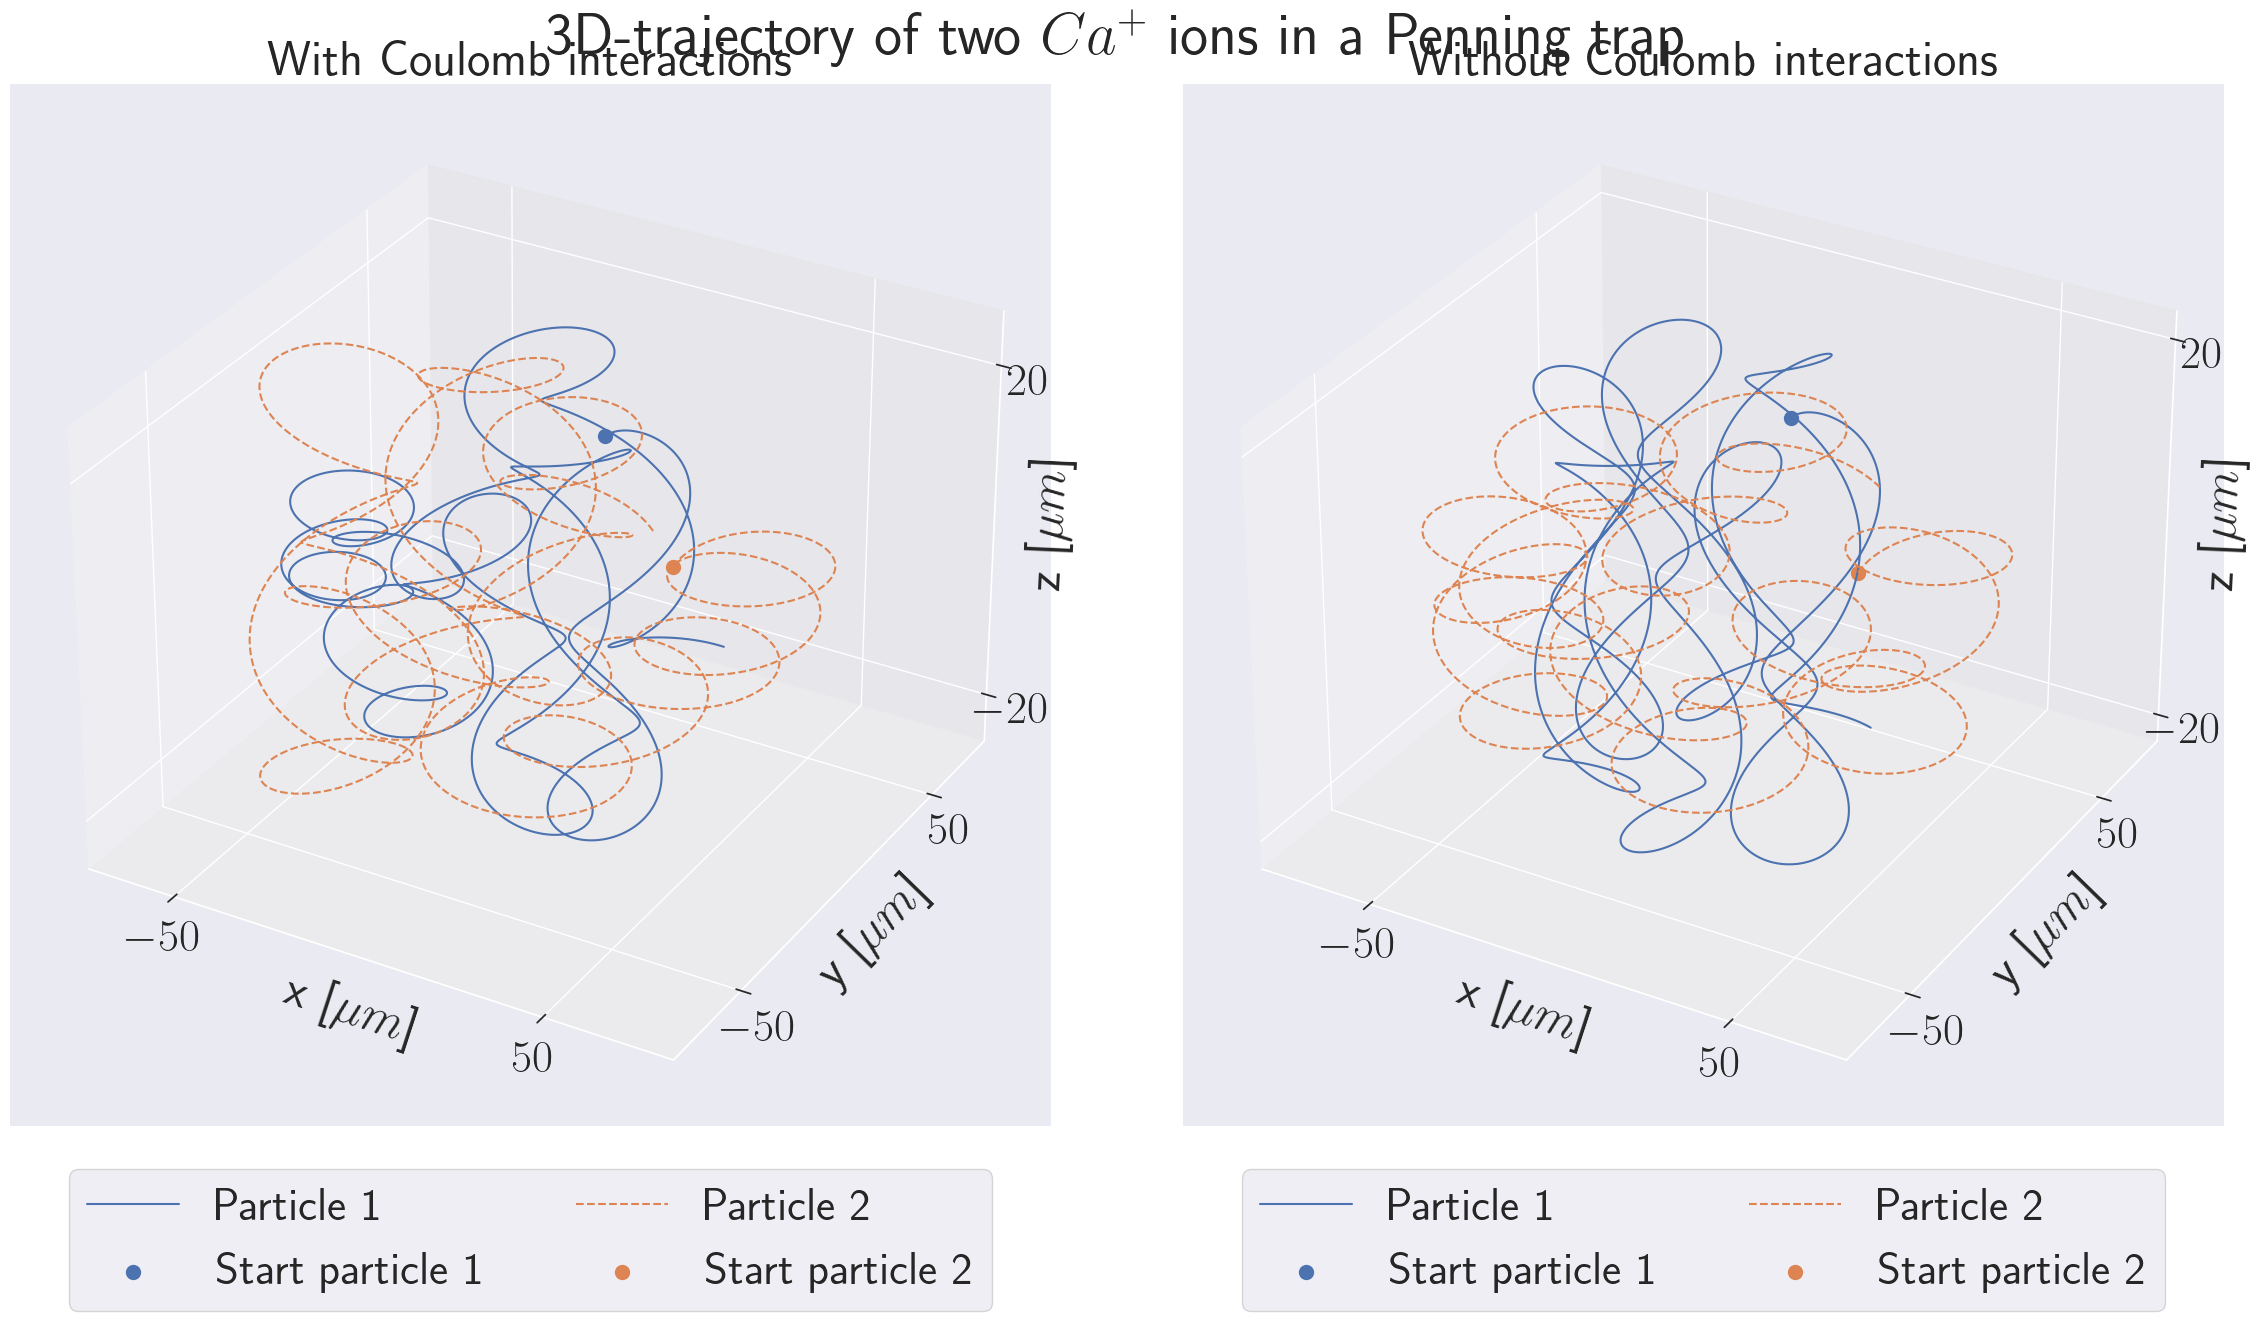

In [152]:
titles = ['With Coulomb interactions', 'Without Coulomb interactions']
fig = plt.figure(figsize = (24, 20))
index = 1
for filename, titlename in zip(files, titles):
    data = np.loadtxt(filename)
    t = data[:, 0]
    pos1 = data[:, 1:4]
    vel1 = data[:, 4:7]
    pos2 = data[:, 7:10]
    vel2 = data[:, 10:13]
    
    axs = fig.add_subplot(1, 2, index, projection = '3d')
    axs.plot3D(pos1[:, 0], pos1[:, 1], pos1[:, 2], label = 'Particle 1')
    axs.scatter(pos1[0, 0], pos1[0, 1], pos1[0, 2], s = 100, label = 'Start particle 1')
    axs.plot3D(pos2[:, 0], pos2[:, 1], pos2[:, 2], linestyle = '--', label = 'Particle 2')
    axs.scatter(pos2[0, 0], pos2[0, 1], pos2[0, 2], s = 100, label = 'Start particle 2')
    axs.set_xlabel(r'x [$\mu m$]')
    axs.set_ylabel(r'y [$\mu m$]')
    axs.set_zlabel(r'z [$\mu m$]')
    axs.set_xticks([-50, 50])
    axs.set_yticks([-50, 50])
    axs.set_zticks([-20, 20])
    axs.set_title(f'{titlename}') 
    lgd = axs.legend(loc = 'lower center', ncol = 2, fancybox = True, 
        bbox_to_anchor = (0.5, -0.2))
    index += 1
fig.suptitle(r'3D-trajectory of two $Ca^{+}$ ions in a Penning trap', y = 0.77)
fig.tight_layout()
plt.savefig('3D.pdf')
plt.show()


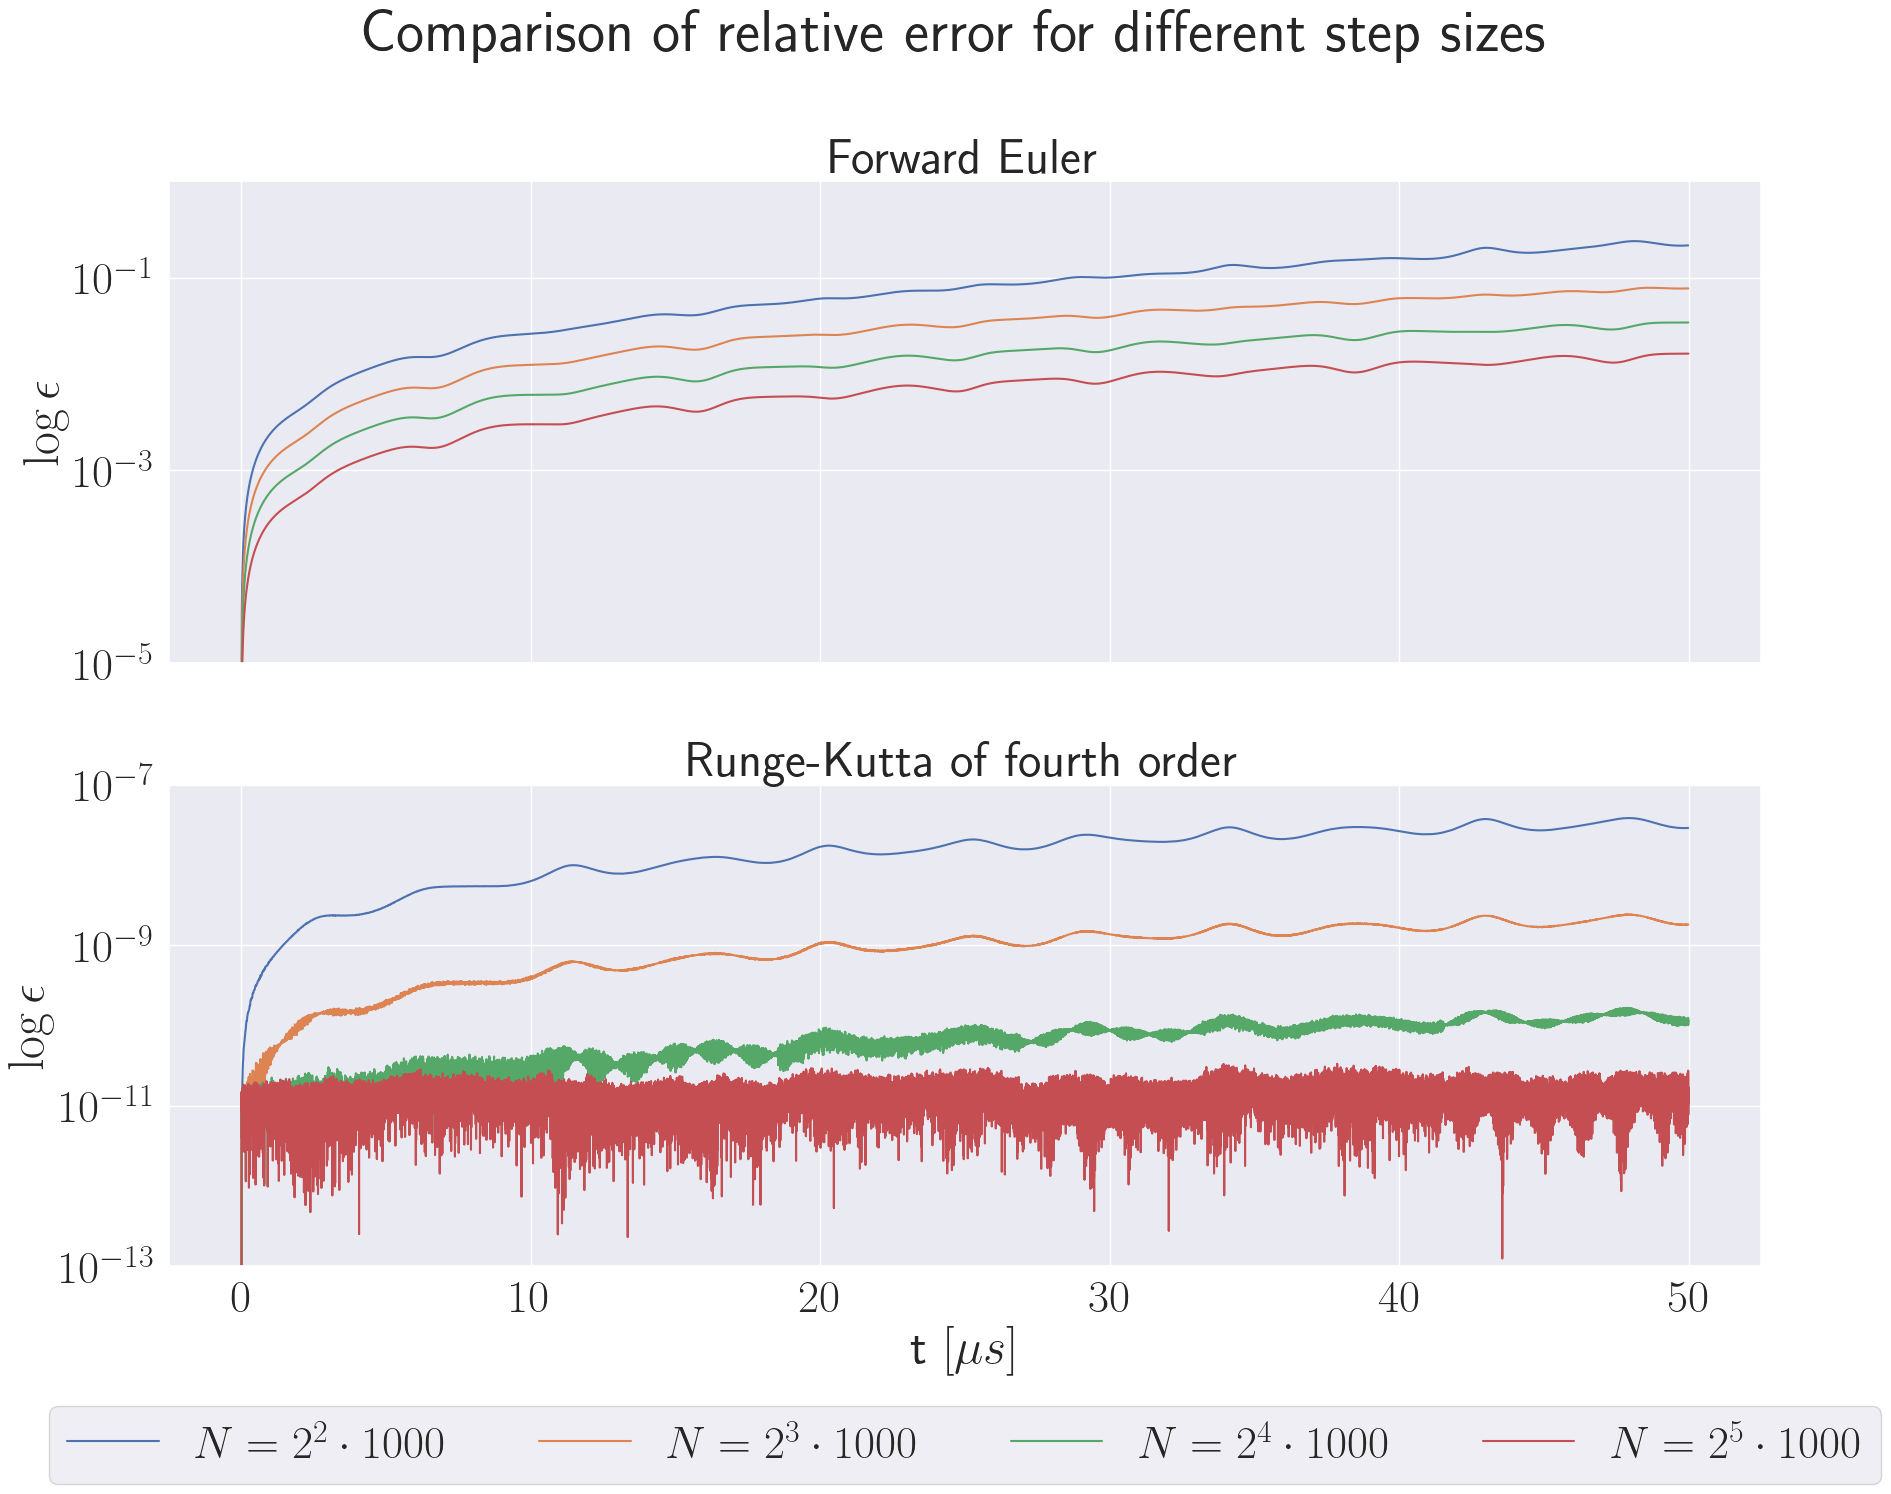

In [153]:
files = ['4000.txt', '8000.txt', '16000.txt', '32000.txt']
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (20, 16), sharex = True)
deltaMaxFE = np.zeros(len(files))
deltaMaxRK4 = np.zeros(len(files))
epsMaxFE = np.zeros(len(files))
epsMaxRK4 = np.zeros(len(files))

for index, file in enumerate(files):
    data = np.loadtxt(file)
    t = data[:, 0]
    posFE = data[:, 1:4]
    velFE = data[:, 4:7]
    posRK4 = data[:, 7:10]
    velRK4 = data[:, 10:13]
    
    q = 1
    m = 40.078
    d = 500
    wz = np.sqrt(2*q*V0/(m*d**2)) 
    w0 = q*B0/m

    v0 = velFE[0, 1]; x0 = posFE[0, 0]; z0 = posFE[0, 2]

    wp = (w0 + np.sqrt(w0**2 - 2*wz**2))/2
    wm = (w0 - np.sqrt(w0**2 - 2*wz**2))/2

    Ap = (v0 + wm*x0)/(wm - wp)
    Am = -(v0 + wp*x0)/(wm - wp)

    f = Ap*np.exp(-1j*wp*t) + Am*np.exp(-1j*wm*t)
    xAna = np.real(f)
    yAna = np.imag(f)
    zAna = z0*np.cos(wz*t)

    rAna = np.transpose(np.array([xAna, yAna, zAna]))
    deltaFE = np.linalg.norm(rAna - posFE, axis = 1)
    deltaRK4 = np.linalg.norm(rAna - posRK4, axis = 1)
    
    deltaMaxFE[index] = np.max(deltaFE)
    deltaMaxRK4[index] = np.max(deltaRK4)
    
    relErrorFE = deltaFE/np.linalg.norm(rAna, axis = 1)
    relErrorRK4 = deltaRK4/np.linalg.norm(rAna, axis = 1)
    
    epsMaxFE[index] = np.max(relErrorFE)
    epsMaxRK4[index] = np.max(relErrorRK4)
    
        
    axs[0].semilogy(t, relErrorFE, label = f'$N = 2^{index + 2} \cdot 1000$')
    axs[1].semilogy(t, relErrorRK4, label = f'$N = 2^{index + 2} \cdot 1000$')
    
axs[1].set_xlabel(r't $[\mu s]$')
axs[0].set_ylabel(r'$\log \epsilon$')
axs[0].set_ylim([1e-5, 1e+0])
axs[1].set_ylim([1e-13, 1e-7])
axs[0].set_title('Forward Euler')
axs[1].set_ylabel(r'$\log \epsilon$')
axs[1].set_title('Runge-Kutta of fourth order')

lgd = axs[1].legend(loc = 'lower center', ncol = 5, fancybox = True, 
           bbox_to_anchor = (0.5, -0.5))
fig.suptitle('Comparison of relative error for different step sizes', y = 0.98)
fig.tight_layout()
plt.savefig('relativeError.pdf')
plt.show()


In [154]:
h = np.array([50/(4e3), 50/(8e3), 50/(16e3), 50/(32e3)])
rErrRK4 = np.zeros(len(h) - 1)
rErrFE = np.zeros(len(h) - 1)
for i in range(0, len(deltaMaxRK4) - 1):
    rErrRK4[i] = np.log(deltaMaxRK4[i + 1]/deltaMaxRK4[i])/np.log(h[i + 1]/h[i])
    rErrFE[i] = np.log(deltaMaxFE[i + 1]/deltaMaxFE[i])/np.log(h[i + 1]/h[i])

print(np.mean(rErrRK4))
print(np.std(rErrRK4, ddof = len(rErrRK4)- 1))
print(np.mean(rErrFE))
print(np.std(rErrFE, ddof = len(rErrFE)- 1))


3.346912338153823
1.383712785426958
1.2440087670037283
0.3025055495768773


In [155]:
(q*B0**2*d**4 - 4*V0*d**4)/(8*q**2*B0**2*V0**2)

-1.3911008652250652

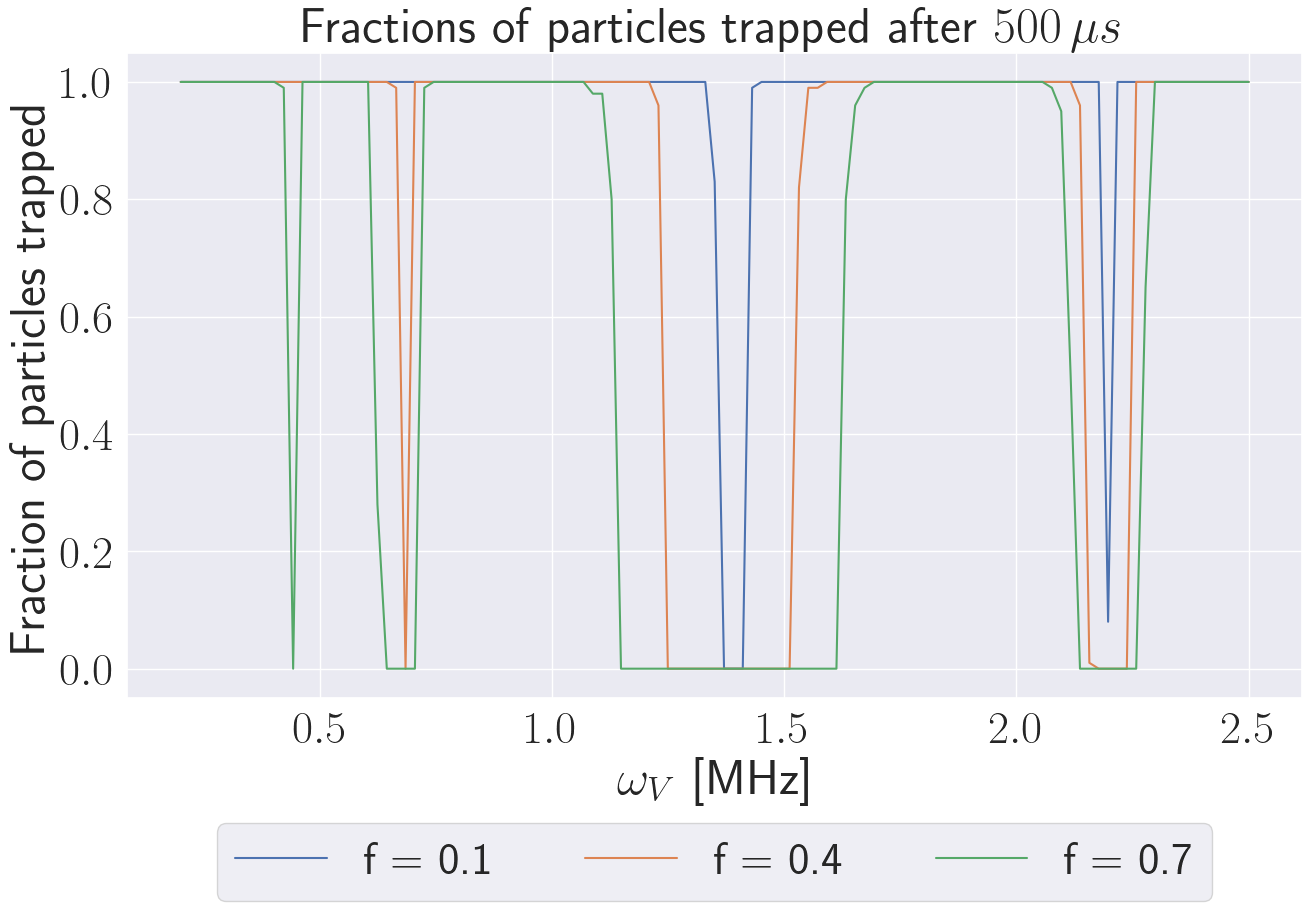

In [156]:
pos = np.array([wz, (wp + wm)/2, np.abs(wp - wm)/2])
posa = np.ones(len(pos))
data = np.loadtxt('fractionWithin.txt')
freq = np.linspace(0.2, 2.5, len(data[0, :]))
f = [0.1, 0.4, 0.7]
fig, axs = plt.subplots(1, 1, figsize = (14, 10))
for index, value in enumerate(f):
    numberWithin = data[index, :]/100
    axs.plot(freq, numberWithin, label = f'f = {f[index]}')
    axs.set_xlabel(r'$\omega_V$ [MHz]')
    axs.set_ylabel(r'Fraction of particles trapped')
lgd = axs.legend(loc = 'lower center', ncol = 3, fancybox = True, 
           bbox_to_anchor = (0.5, -0.35))
fig.tight_layout()
axs.set_title(r'Fractions of particles trapped after $500 \, \mu s$')
plt.savefig('fractions.pdf')
plt.show()


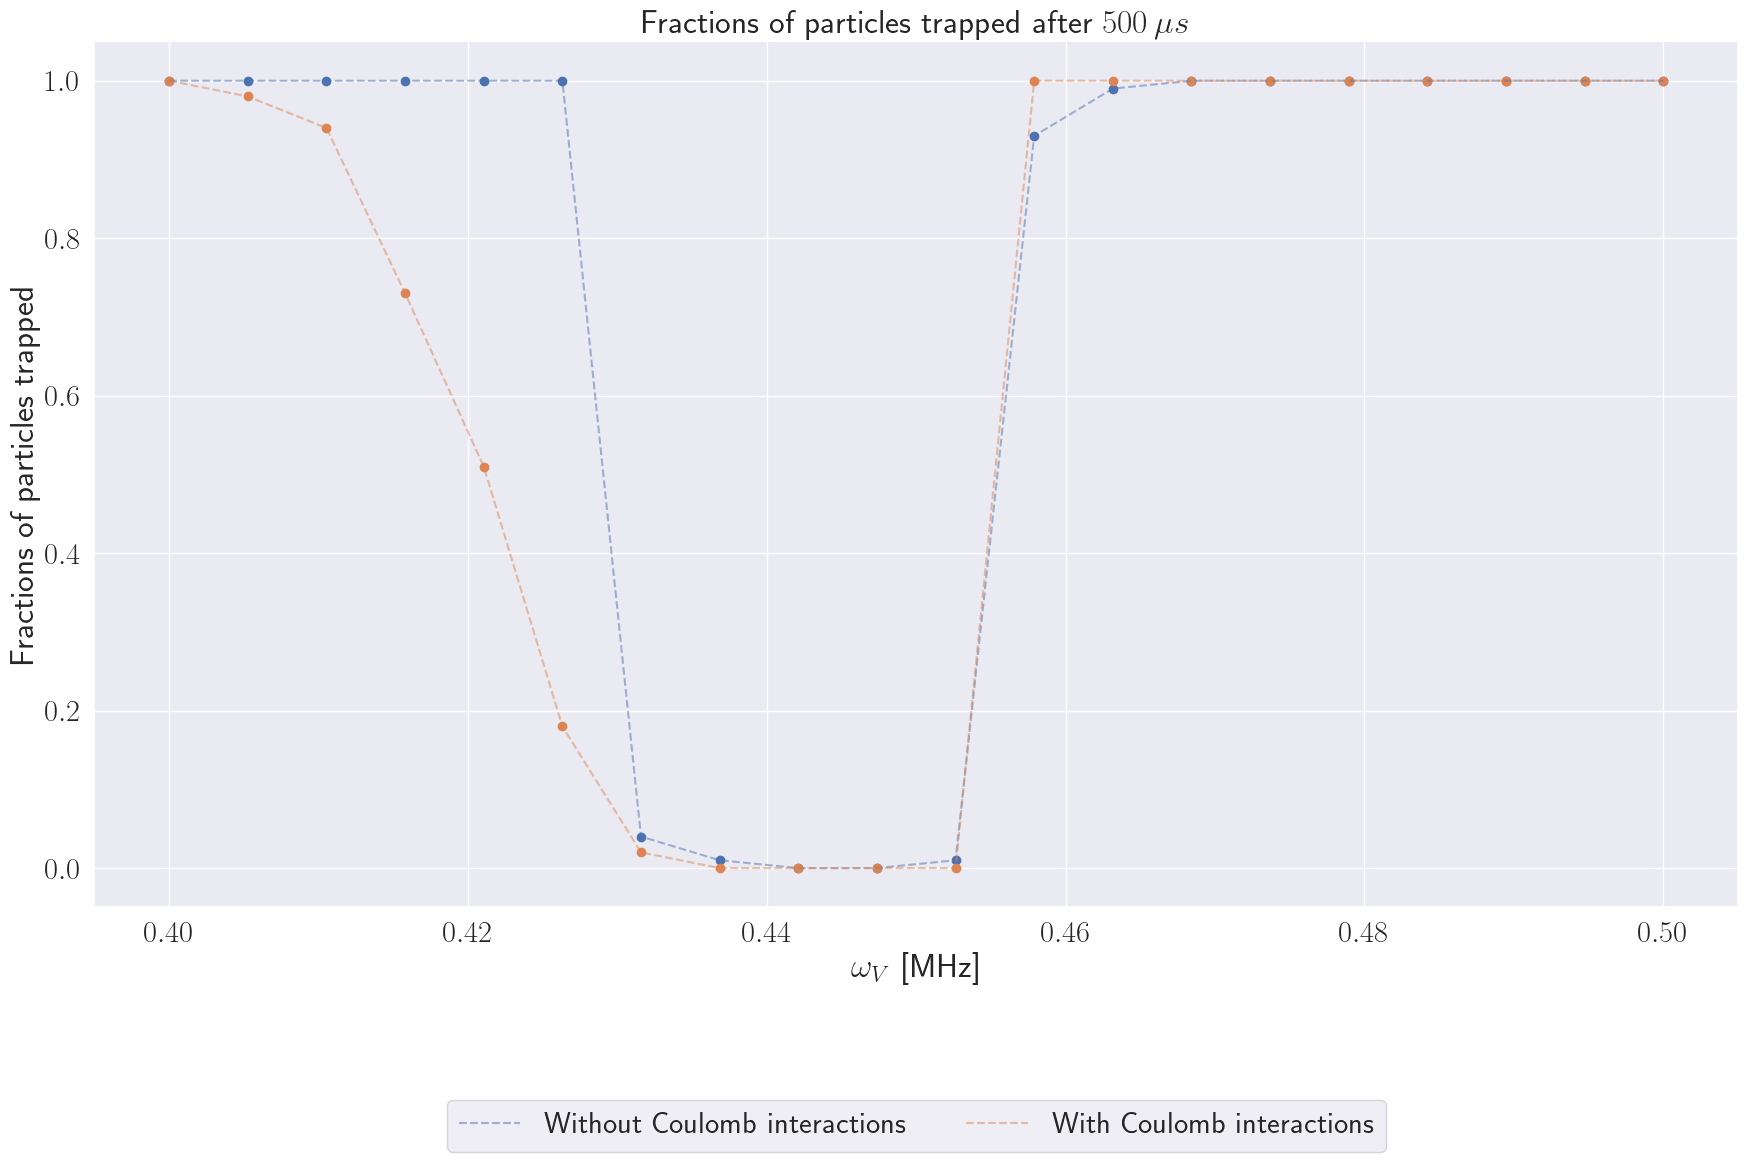

In [163]:
data = np.zeros(shape = (2, 20))
with open('fractionWithinZoom.txt', 'r') as infile:
    index = 0
    for lines in infile: 
        words = lines.split()
        if words[0] == 'Iteration': #skip all lines without numbers
            infile.readline()
        else:
            data[index, :] = words
            index += 1
            
freq = np.linspace(0.4, 0.5, len(data[0, :]))
fig, axs = plt.subplots(1, 1, figsize = (18, 12))
axs.scatter(freq, data[0, :]/100)
axs.plot(freq, data[0, :]/100, label = 'Without Coulomb interactions', alpha = 0.5, linestyle = '--')
axs.scatter(freq, data[1, :]/100)
axs.plot(freq, data[1, :]/100, label = 'With Coulomb interactions', alpha = 0.5, linestyle = '--')
axs.set_xlabel(r'$\omega_V$ [MHz]')
axs.set_ylabel(r'Fractions of particles trapped')
lgd = axs.legend(loc = 'lower center', ncol = 2, fancybox = True, 
           bbox_to_anchor = (0.5, -0.3))
fig.tight_layout()
axs.set_title(r'Fractions of particles trapped after $500 \, \mu s$')
plt.savefig('fractionsZoomed.pdf')
plt.show()
